In [71]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import tree


(1280, 1024, 3)


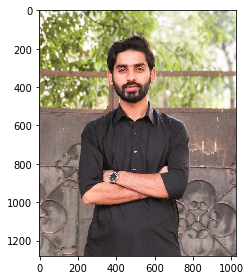

In [72]:
img = imread('bilal.jpeg')
imshow(img)
print(img.shape)

(128, 64, 3)


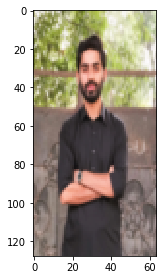

In [73]:
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

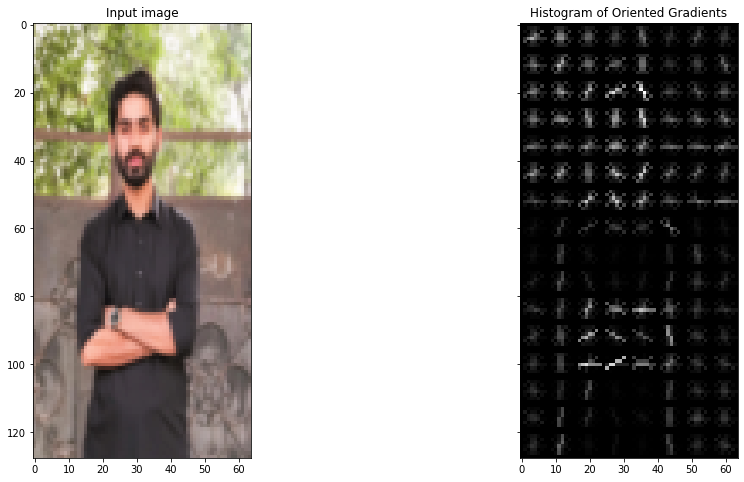

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [75]:
Xtr=np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
Xts=np.loadtxt("TestData.csv")

In [76]:
import matplotlib.pyplot as plt
bilal=Xtr[10].reshape([28,28])


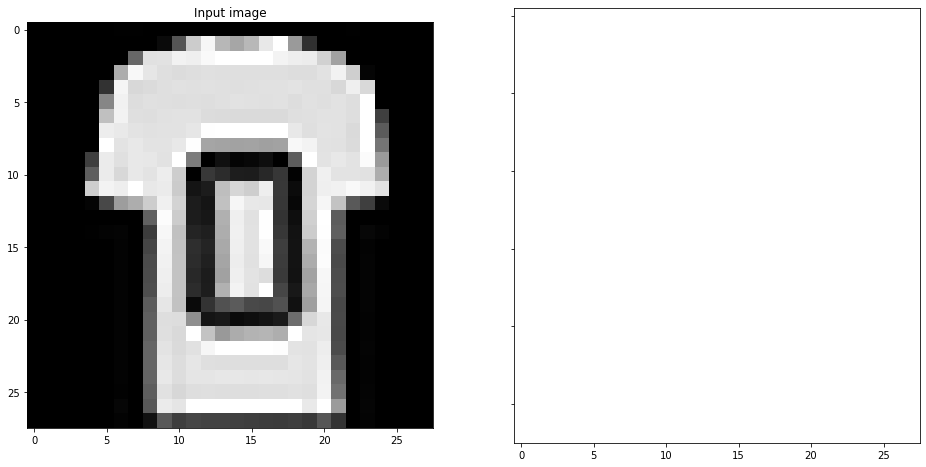

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
lis=[]
ax1.imshow(bilal, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
for i in Xtr:
    x=i.reshape([28,28])
    fd, hog_image = hog(x, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=None)
    lis.append(fd)


plt.show()

In [80]:
np.array(lis).shape

(12000, 144)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(lis, Ytr, test_size=0.20)

In [82]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()


In [83]:
model.fit(X_train, y_train)
y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.7508333333333334

In [84]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
p=clf.predict(X_test)

In [85]:
accuracy_score(y_test, p)

0.6883333333333334

In [94]:
from sklearn.svm import SVC
clf = SVC()
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [95]:
accuracy_score(y_test, y_pred)

0.7766666666666666

In [91]:
lis2=[]
for i in Xts:
    x=i.reshape([28,28])
    fd, hog_image = hog(x, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=None)
    lis2.append(fd)

In [92]:
y_pred = clf.predict(lis2)

In [93]:
np.savetxt('Test_Data_Predictions.csv', np.array(y_pred))